In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
# loding data
churn = pd.read_excel(r'C:\Users\khanh\OneDrive - National Economics University\ML/churn_prediction.xlsx', sheet_name='Sheet1')

In [3]:
# checking of the data if loaded correctly
print("top 5 observations in data")
churn.head()

top 5 observations in data


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# About the Dataset

In [4]:
# checking info of data
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
# checking shape of dataset
print("The shape of dataset is :{}".format(churn.shape))

The shape of dataset is :(5630, 20)


In [6]:
# describing data
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [7]:
# describing data including object variable as well
churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,NaN,NaN,NaN,52815.5,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,NaN,NaN,NaN,0.168384,0.37424,0.0,0.0,0.0,0.0,1.0
Tenure,5366.0,NaN,NaN,NaN,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
PreferredLoginDevice,5630,3,Mobile Phone,2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,5630.0,NaN,NaN,NaN,1.654707,0.915389,1.0,1.0,1.0,3.0,3.0
WarehouseToHome,5379.0,NaN,NaN,NaN,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
PreferredPaymentMode,5630,7,Debit Card,2314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,5630,2,Male,3384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourSpendOnApp,5375.0,NaN,NaN,NaN,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5630.0,NaN,NaN,NaN,3.688988,1.023999,1.0,3.0,4.0,4.0,6.0


In [8]:
# checking for null values
churn.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount and DaySinceLastOrder have null values present. 

In [9]:
# checking for duplicate values
print("Number of duplicate rows:",churn.duplicated().sum())

Number of duplicate rows: 0


From the preliminary Data set we can see that there are certain missing values. There are no duplicate entries.

There are 5630 rows and 20 columns.

Looking at the Data types, it doesnt look like there's any anomaly in the values in the dataset.

# Cleaning


## Standardize categorical values for PreferredPaymentMode, PreferredLoginDevice, and PreferedOrderCat 


Eg. Some rows recorded 'CC', some 'Credit Card'


In [10]:
churn['PreferredPaymentMode'].unique()
churn['PreferredLoginDevice'].unique()
churn['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [11]:
churn['PreferredPaymentMode'] = churn['PreferredPaymentMode'].replace('COD','Cash on Delivery')
churn['PreferredPaymentMode'] = churn['PreferredPaymentMode'].replace('CC','Credit Card')
churn['PreferredLoginDevice'] = churn['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')
churn['PreferedOrderCat'] = churn['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

# Handling Missing Data

In [12]:
feature_na = churn.isna().sum().sort_values(ascending=False).to_frame().rename({0:'Missing values'},axis=1)
feature_na = feature_na[feature_na['Missing values']!=0]
feature_na['percentage(%)'] = round(feature_na['Missing values']/churn.shape[0],4)*100
feature_na['data type'] = churn[feature_na.index.tolist()].dtypes.values
feature_na

,Missing values,percentage(%),data type
DaySinceLastOrder,307,5.45,float64
OrderAmountHikeFromlastYear,265,4.71,float64
Tenure,264,4.69,float64
OrderCount,258,4.58,float64
CouponUsed,256,4.55,float64
HourSpendOnApp,255,4.53,float64
WarehouseToHome,251,4.46,float64


# Outliers of each feature above

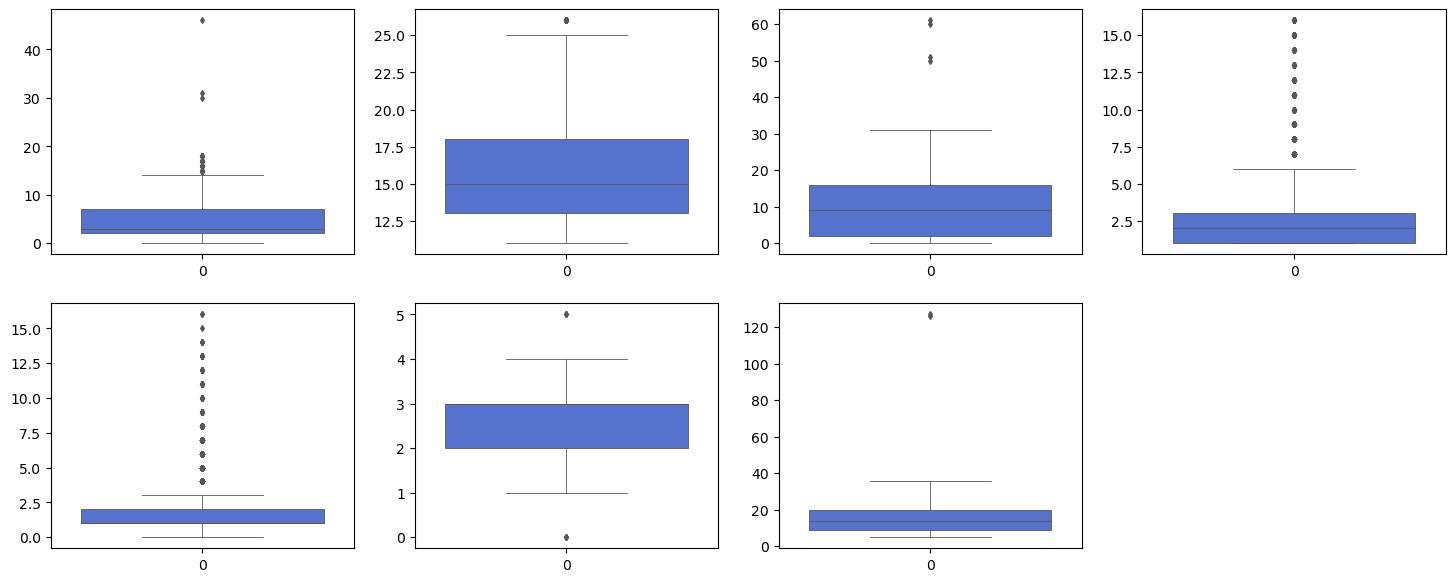

In [13]:
col_na = feature_na.index.tolist()

plt.figure(figsize=(18,7))
for i in range(len(feature_na.index)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(churn[col_na[i]],fliersize=3,linewidth=0.6,color='royalblue')

In [14]:
for col in churn[col_na].columns:
    churn.loc[churn[col].isna(),col]=churn[col].median()

In [15]:
churn[col_na].isna().sum()

DaySinceLastOrder              0
OrderAmountHikeFromlastYear    0
Tenure                         0
OrderCount                     0
CouponUsed                     0
HourSpendOnApp                 0
WarehouseToHome                0
dtype: int64

# Handling outliers

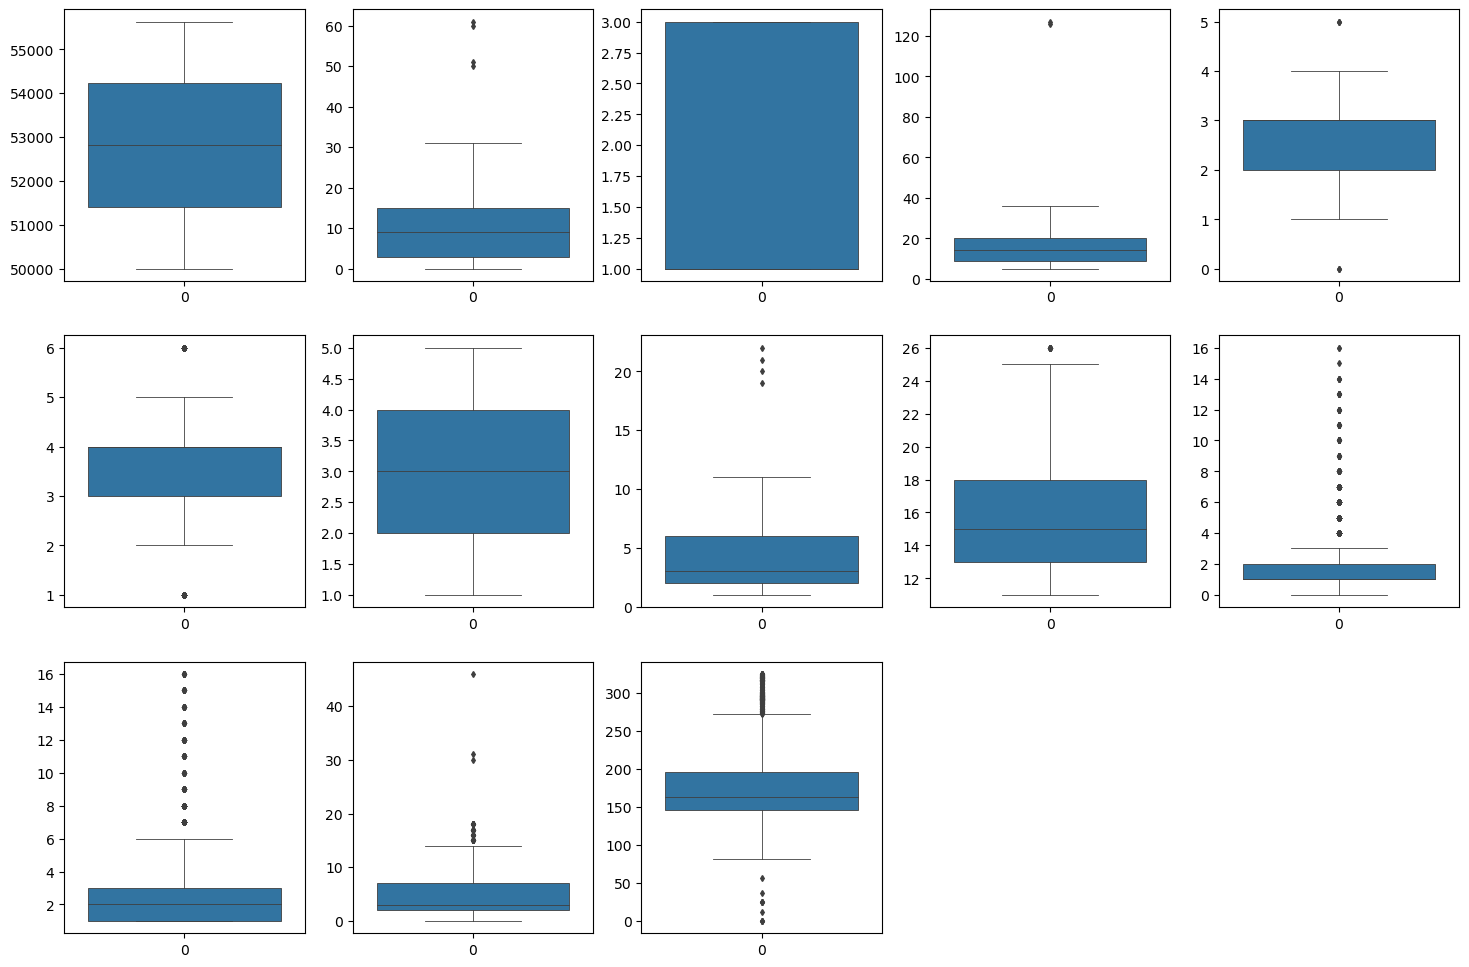

In [16]:
num_features = (churn.select_dtypes('number').nunique()>2).sort_values()[2:].index.tolist()

plt.figure(figsize=(18,12))
for col in range(len(num_features)):
    plt.subplot(3,5,col+1)
    sns.boxplot(churn[num_features[col]],fliersize=3,linewidth=0.6)

After review the box plot, we will replace outliers by median

In [17]:
z  = np.abs(stats.zscore(churn[num_features]))
churn_new = churn[(z<3).all(axis=1)]
churn_new

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


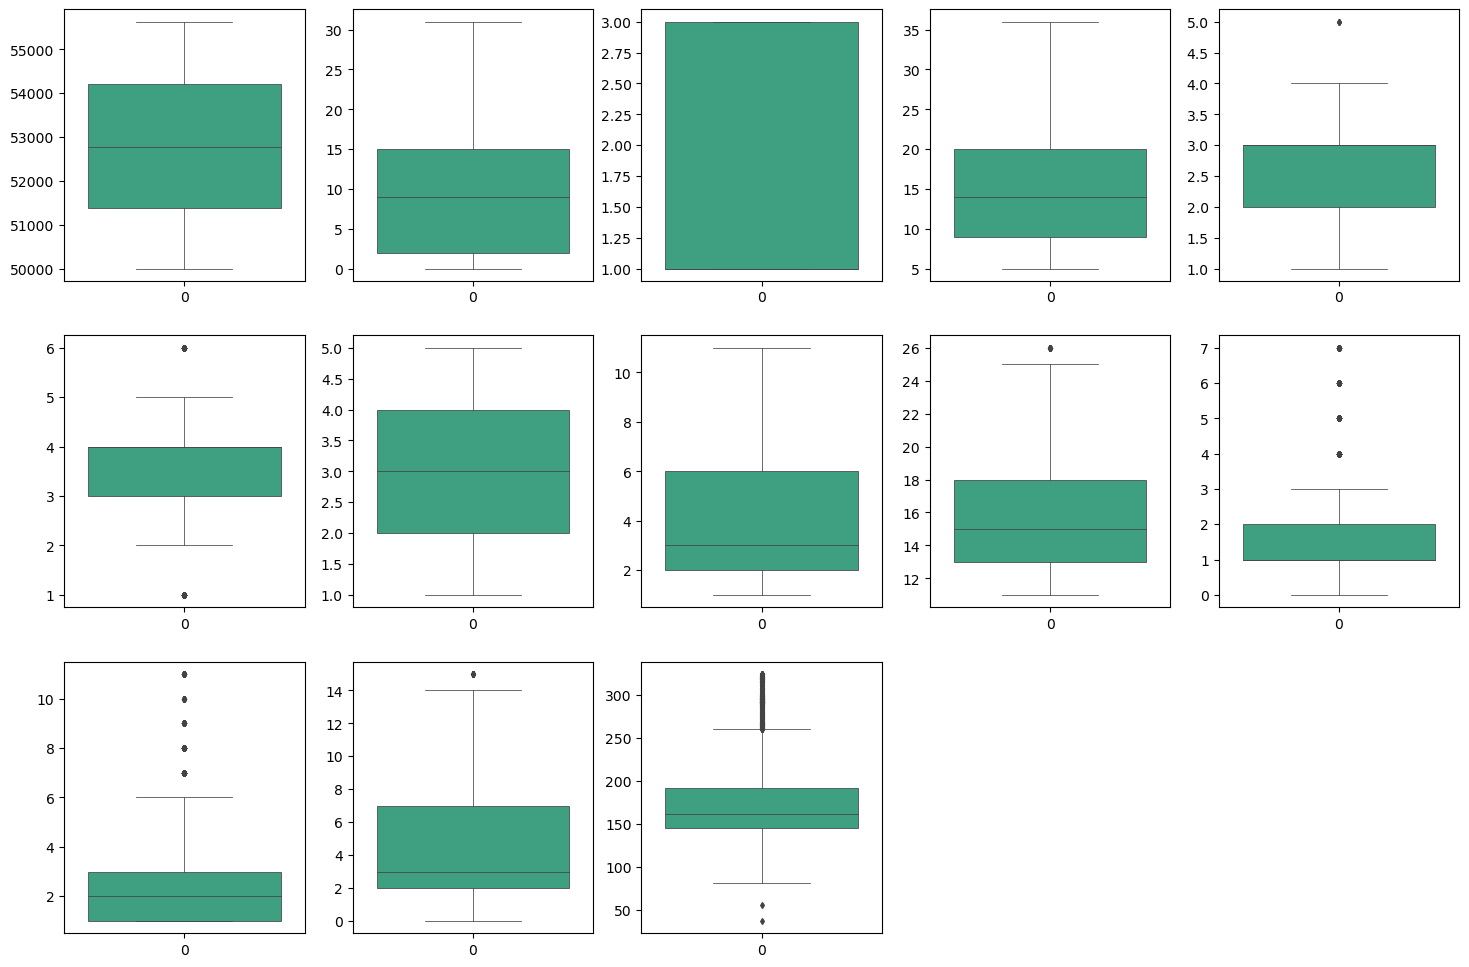

In [18]:
plt.figure(figsize=(18,12))
for col in range(len(num_features)):
    plt.subplot(3,5,col+1)
    sns.boxplot(churn_new[num_features[col]],fliersize=3,linewidth=0.55,color='#2eb086')

In [19]:
print('Before remove outliers: {} '.format(churn.shape[0]))
print('After remove outliers : {} '.format(churn.shape[0]))

Before remove outliers: 5630 
After remove outliers : 5630 


# Feature Engineering

Lets caurve out a new variable -> Average Cashback per order

This feature can help you understand how cashback incentives impact customer spending patterns and whether it has any influence on churn. High average cashback per order may indicate that customers who receive more cashback are less likely to churn, while low average cashback per order may suggest the opposite.

In [20]:
churn_new['avg_cashbk_per_order'] = churn_new['CashbackAmount'] / churn_new['OrderCount']

In [21]:
#Percentage of customer churn
Churn_perc = round((churn_new['Churn'][churn['Churn']==1].count()*100/churn_new['Churn'][churn_new['Churn']==0].count()),2)

In [22]:
print('The average customer churn is:', Churn_perc, '%')

The average customer churn is: 20.55 %


# Exploratory Data Analysis (EDA)

In [23]:
churn = churn_new['Churn'].value_counts().to_frame()
churn['percentage'] = round(churn['Churn']/churn['Churn'].sum()*100,2)
churn.index = ['No','Yes']

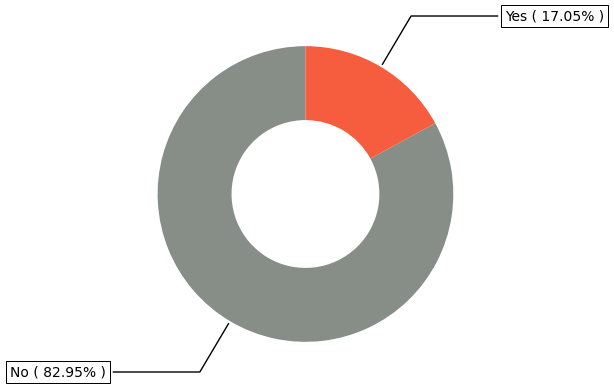

In [24]:
fig,ax = plt.subplots()
wedges, texts = ax.pie(churn.Churn,colors=['#878E88','#F55D3E'], startangle=90,wedgeprops=dict(width=0.5))
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(churn.index[i] + " ( " + str(round(churn.percentage[i], 2)) + "% )", xy=(x, y), 
                xytext=(1.35*np.sign(x), 1.4*y),horizontalalignment=horizontalalignment, **kw)

## Start visualize to decide the columns

In [25]:
def analysis_cat(feature, xaxis=0):
    count = churn_new[feature].value_counts()
    pct_count = churn_new[feature].value_counts(normalize=True)
    churn_count = pd.DataFrame({feature: count.index,
                                'Count': count.values,
                                'Percentage': round(pct_count * 100, 2)})

    # Calculate the percentage of customer churned per category
    cat_pct = churn_new[churn_new.Churn == 1][feature].value_counts().to_frame()
    cat_pct['percentage'] = round(cat_pct[feature] / churn_new[feature].value_counts() * 100, 2)
    cat_pct = cat_pct.reset_index().sort_values('index')

    fig, ax = plt.subplots(1, 2, figsize=(17, 6))

    sns.countplot(x=feature, data=churn_new, ax=ax[0], hue='Churn', palette=['lightgrey', '#F55D3E'],
                  order=cat_pct['index'])
    ax[0].set_title(feature + '\n', fontsize=15, fontweight=550)
    ax[0].legend(['Not churn', 'Churn'])
    ax[0].set_ylabel('')

    sns.barplot(x='index', y='percentage', data=cat_pct, ax=ax[1], color='#F55D3E', order=cat_pct['index'])
    ax[1].set_title('% Churn rate by ' + feature + '\n', fontsize=16, fontweight=550)
    ax[1].set_ylabel('Churn percentage')
    for x, y in zip(range(len(cat_pct['index'])), cat_pct.percentage):
        ax[1].text(x - xaxis, y + 0.4, str(y) + '%', fontsize=10, color='#F55D3E', fontweight=550)

    ax[0].set_xlabel('')
    ax[1].set_xlabel('')
    return churn_count

def analysis_num(feature, bins='auto'):
    sns.histplot(churn_new[churn_new['Churn'] == 1][feature], label='Churn', color='#F55D3E', edgecolor='#F55D3E', kde=True,
                 bins=bins)
    sns.histplot(churn_new[churn_new['Churn'] == 0][feature], label='No churn', color='tab:grey',
                 edgecolor='lightgrey', kde=True, bins=bins)

    plt.legend()
    plt.title(feature + ' by Customer churn', fontsize=16, fontweight=550)
    plt.ylabel('')

    plt.rc('axes', axisbelow=True)
    plt.grid(False)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

##### PreferredLoginDevice

,PreferredLoginDevice,Count,Percentage
Mobile Phone,Mobile Phone,3803,71.08
Computer,Computer,1547,28.92


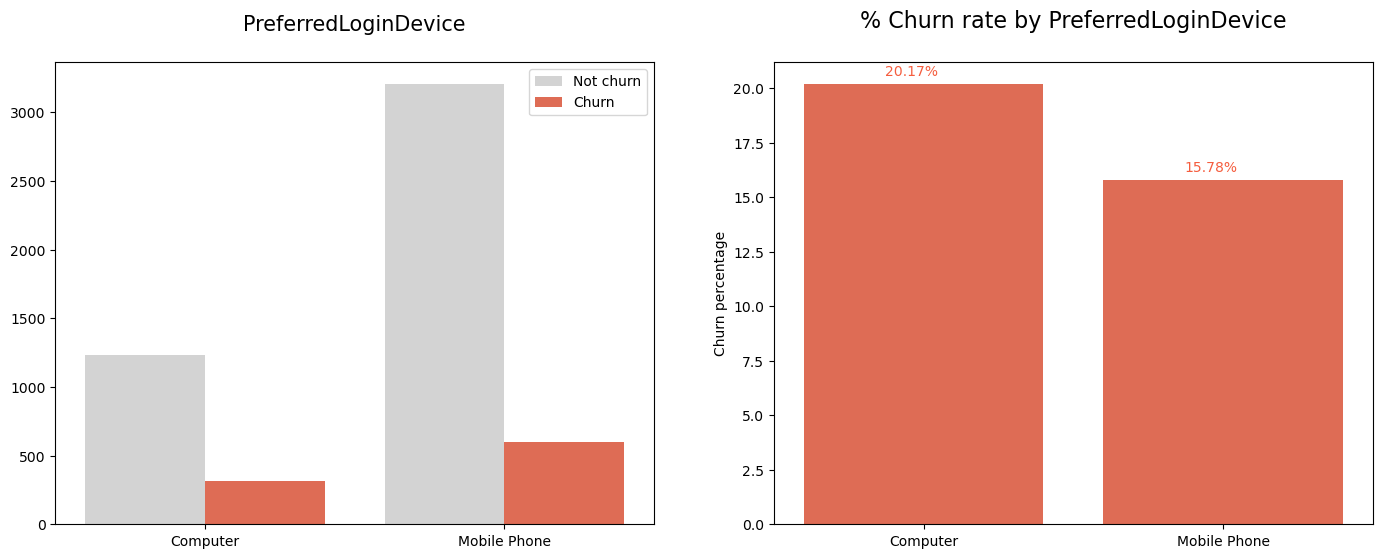

In [26]:
analysis_cat('PreferredLoginDevice', 0.13)

For both churn or not churn users, they refer to use phone more than computer.

##### CityTier

,CityTier,Count,Percentage
1,1,3485,65.14
3,3,1627,30.41
2,2,238,4.45


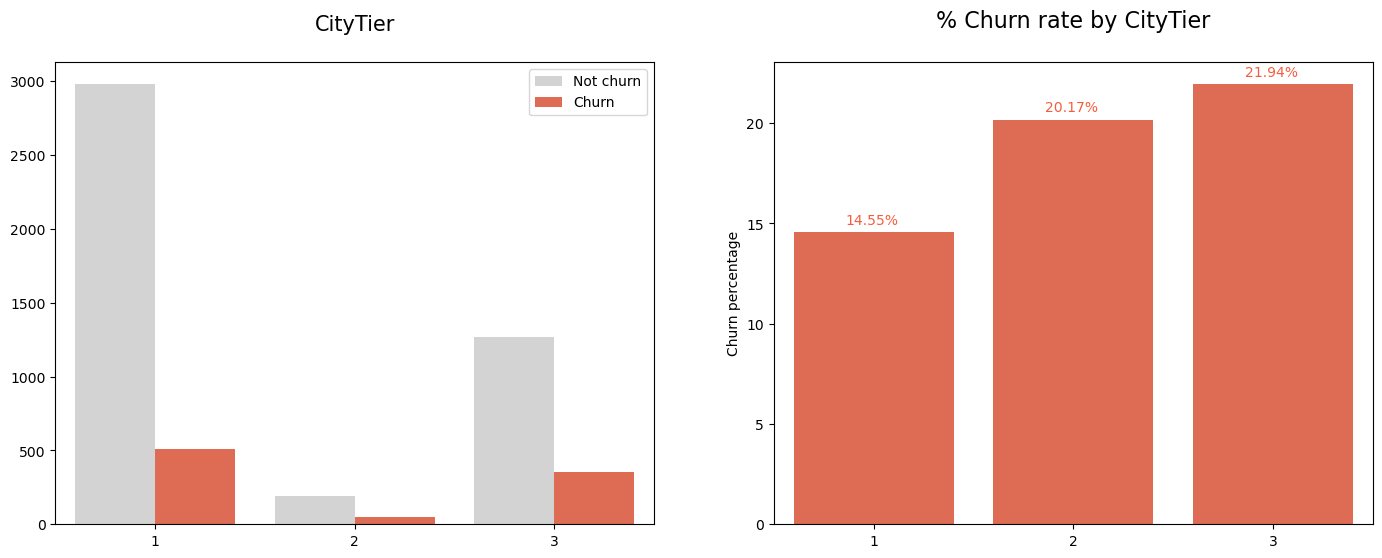

In [27]:
analysis_cat('CityTier',0.14)

For both churn or not churn users, they most live in citytier=1 and citytier=3

##### PreferredPaymentMode

,PreferredPaymentMode,Count,Percentage
Debit Card,Debit Card,2195,41.03
Credit Card,Credit Card,1686,31.51
E wallet,E wallet,579,10.82
Cash on Delivery,Cash on Delivery,489,9.14
UPI,UPI,401,7.50


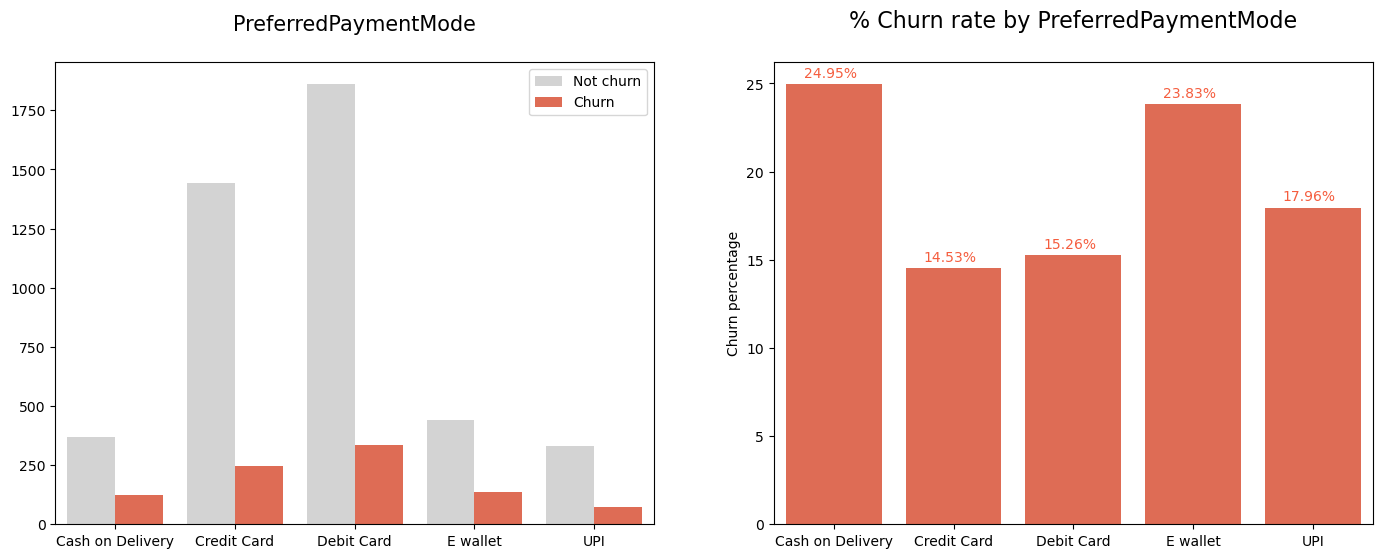

In [28]:
analysis_cat('PreferredPaymentMode',0.25)

There's no significant difference in payment method between churned & not churned users

##### MartialStatus

,MaritalStatus,Count,Percentage
Married,Married,2825,52.80
Single,Single,1722,32.19
Divorced,Divorced,803,15.01


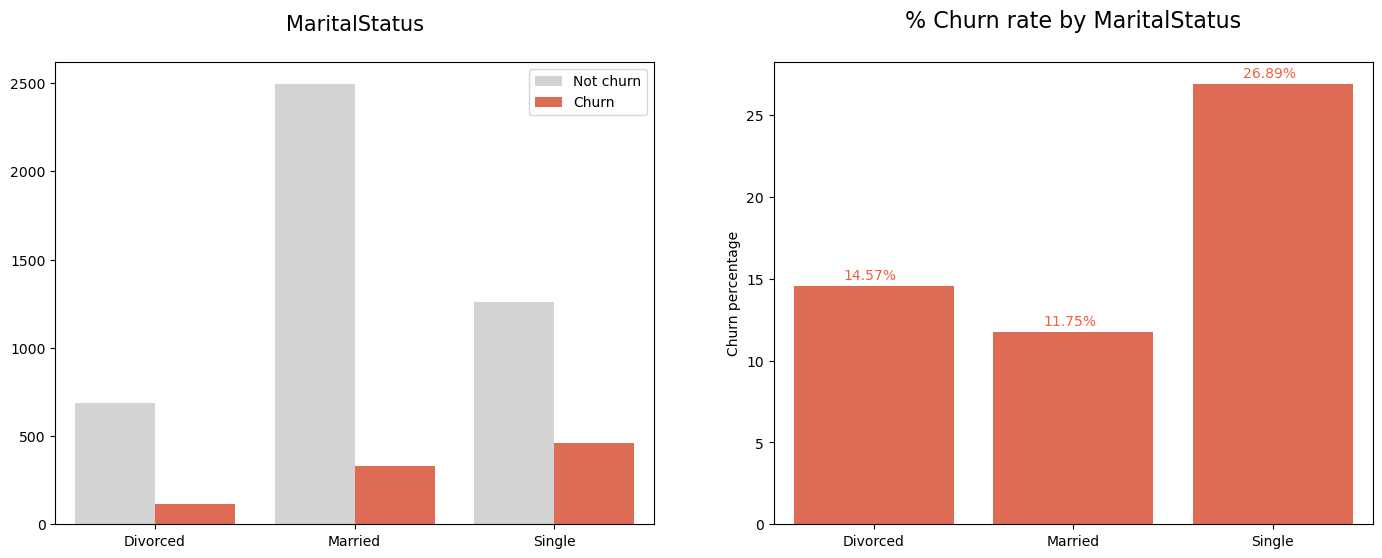

In [29]:
analysis_cat('MaritalStatus',0.15)

Churned users have status Single more than notchurn users. And notchurn users have married status more than churn.

&rarr; We can add this feature to the model

##### Gender

,Gender,Count,Percentage
Male,Male,3214,60.07
Female,Female,2136,39.93


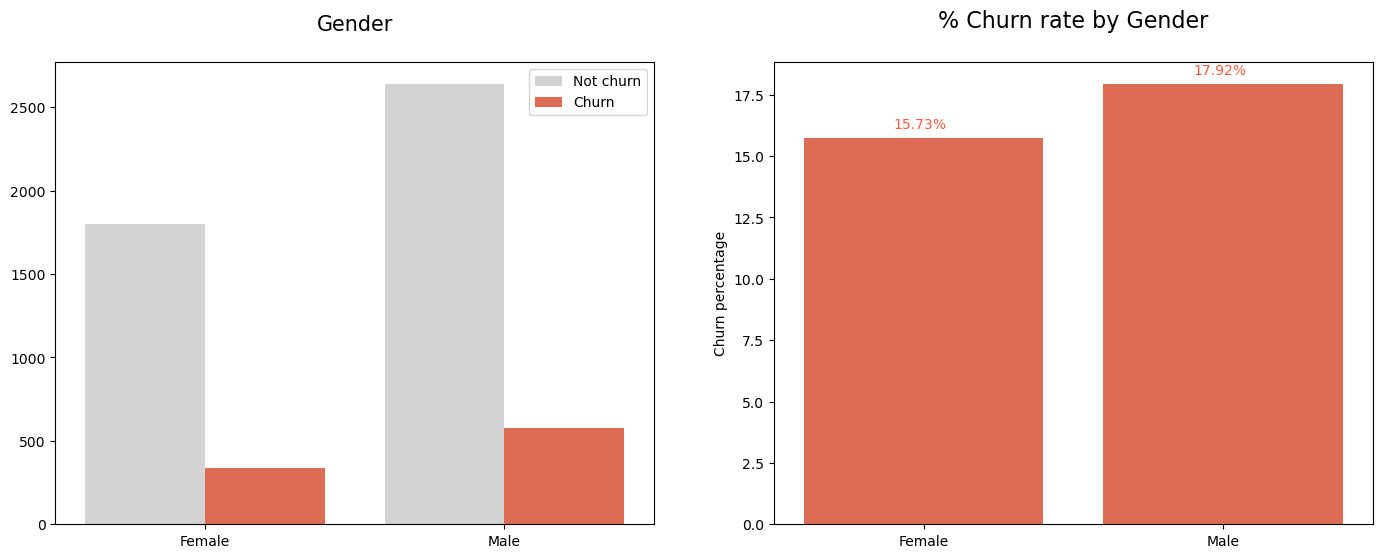

In [30]:
analysis_cat('Gender',0.1)


There's no significant difference in gender between churned & not churned users

##### PreferedOrderCat

,PreferedOrderCat,Count,Percentage
Mobile Phone,Mobile Phone,2053,38.37
Laptop & Accessory,Laptop & Accessory,2000,37.38
Fashion,Fashion,752,14.06
Grocery,Grocery,332,6.21
Others,Others,213,3.98


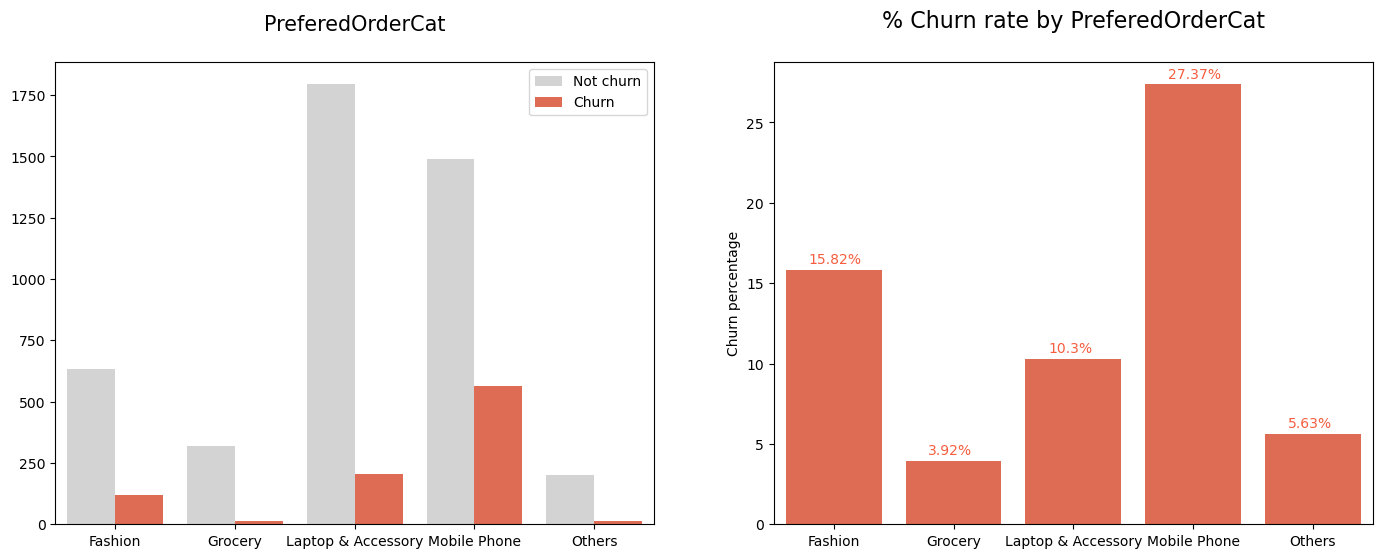

In [31]:
analysis_cat('PreferedOrderCat',0.21)

For churned users,
* They refer to buy Mobile Phone than others.
* They buy Grocery and Laptop less than not churn users.

##### Complain

,Complain,Count,Percentage
0,0,3818,71.36
1,1,1532,28.64


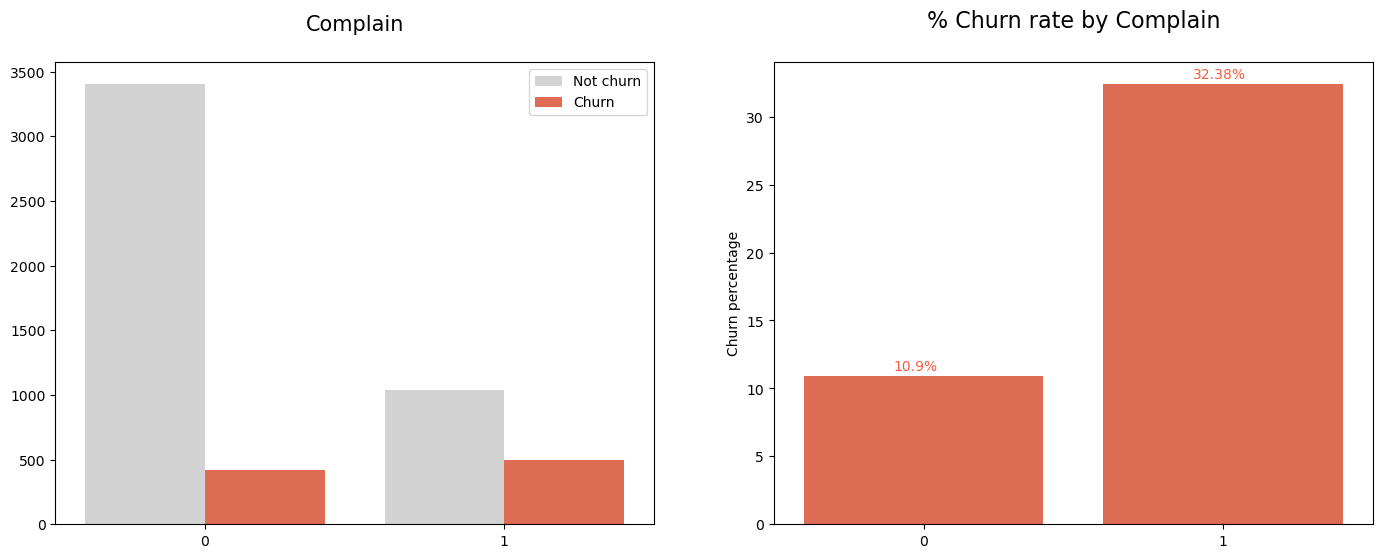

In [32]:
analysis_cat('Complain',0.1)

The number of users complain on churn is higher than not churn

&rarr; Use this feature on the model

##### Comlain by category

In [33]:
com_cat_gen = churn_new.groupby(['PreferedOrderCat','Complain','Gender']).count()['Tenure'].to_frame().reset_index()
com_cat_gen = com_cat_gen[com_cat_gen['Complain']==1]
com_cat_gen.columns = ['Category','Complain','Gender','Counts']
com_cat_gen['percentage'] = round(com_cat_gen.Counts/com_cat_gen.Counts.sum()*100,2)

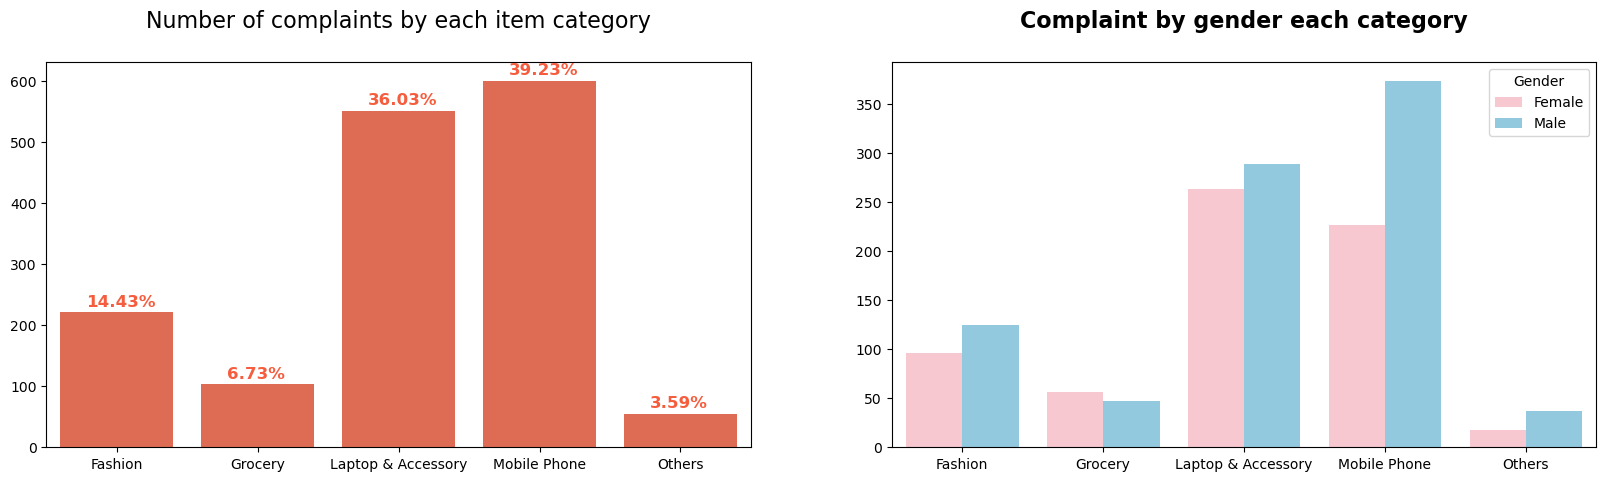

In [34]:
com_yes = com_cat_gen.groupby('Category').sum().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Bar plot for 'com_yes' DataFrame
sns.barplot(x='Category', y='Counts', data=com_yes, color='#F55D3E', ax=ax[0])
ax[0].set_title('Number of complaints by each item category\n', size=16, fontweight=550)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

# Bar plot for 'com_cat_gen' DataFrame
sns.barplot(x='Category', y='Counts', data=com_cat_gen, hue='Gender', palette=['pink', 'skyblue'], ax=ax[1])
ax[1].set_title('Complaint by gender each category\n', size=16, fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

for x, y, z in zip(range(len(com_yes.Category)), com_yes.Counts, round(com_yes.percentage, 2)):
    ax[0].text(x-0.22, y+10, str(z)+'%', fontsize=12, color='#f55d3e', fontweight='semibold')

plt.show()


##### Average cashback per item

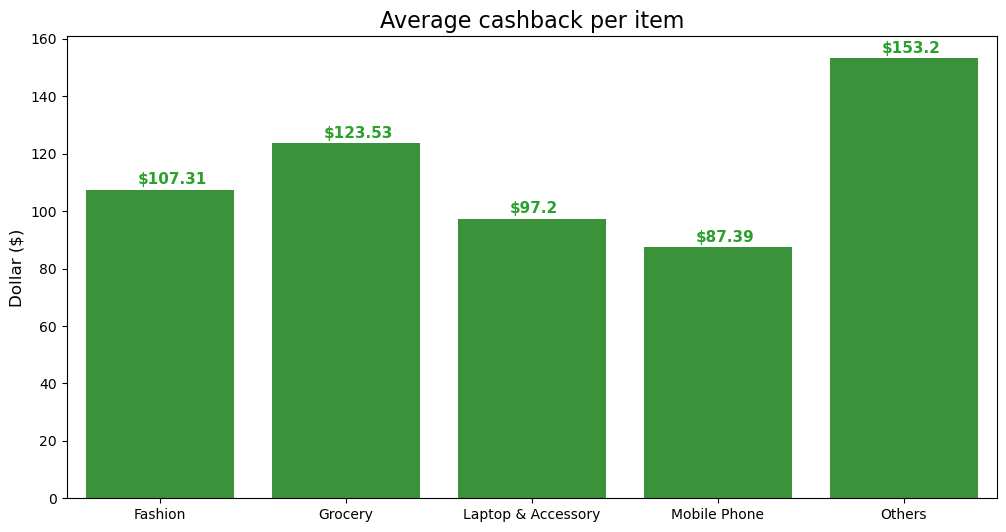

In [35]:
avg_cb = round(churn_new['CashbackAmount'] / churn_new['OrderCount'], 2)
avg = pd.concat([churn_new['PreferedOrderCat'], avg_cb], axis=1).groupby('PreferedOrderCat').mean().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg.index, y=avg[0], color='tab:green')
plt.title('Average cashback per item', size=16)
plt.xlabel('')
plt.ylabel('Dollar ($)', size=12)

for x, y in zip(range(len(avg.index)), avg[0]):
    plt.text(x-0.12, y + 2, '$' + str(round(y, 2)), size=11, color='tab:green', fontweight='bold')

plt.show()


##### SatisfactionScore

,SatisfactionScore,Count,Percentage
3,3,1620,30.28
1,1,1118,20.90
5,5,1034,19.33
4,4,1024,19.14
2,2,554,10.36


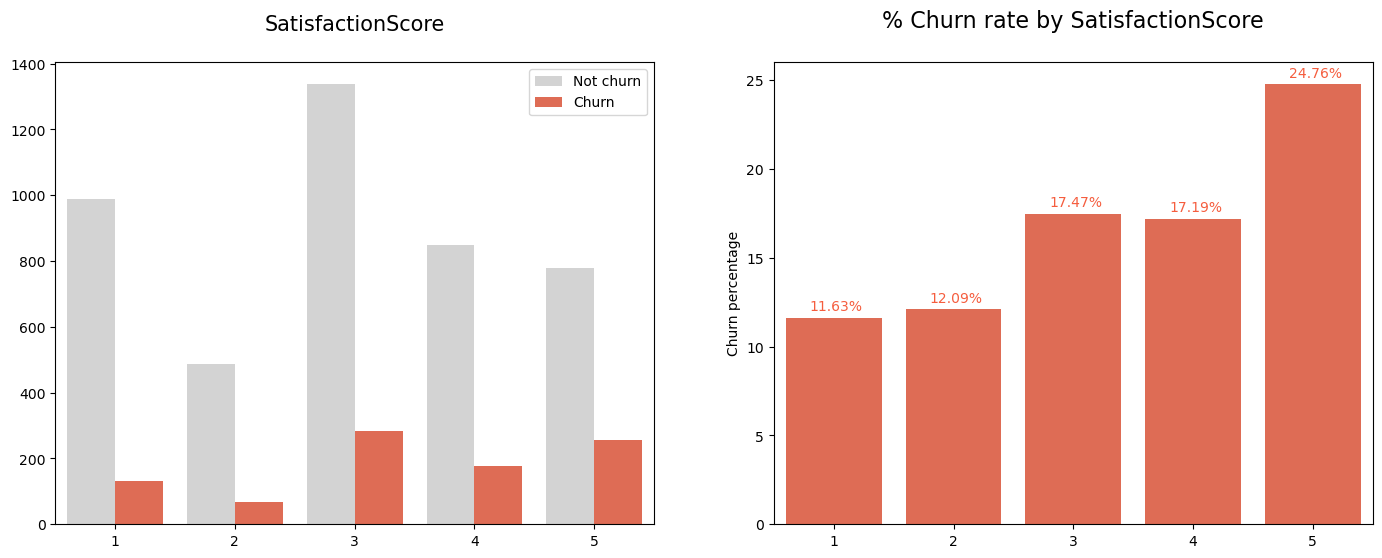

In [36]:
analysis_cat('SatisfactionScore',0.2)


Churn users have lower percentage in score = 1 than not churn users and higher in score = 5

&rarr; Although there're significantly different between churn and not churn in score 1 and 5, there's no making sense as logical aspect. If we add this feature into model, non logic result can happen.

##### Tenure

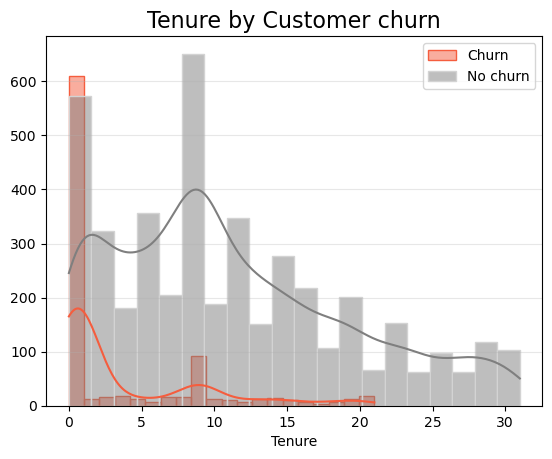

In [37]:
analysis_num('Tenure',20)


In [38]:
def tenure(x):
    if x < 15:
        return 'Less than 1.5 years'
    else:
        return 'More/same than 1.5 years'

In [39]:
churn_new['tenure_grouped'] = churn_new['Tenure'].apply(tenure)


,tenure_grouped,Count,Percentage
Less than 1.5 years,Less than 1.5 years,3973,74.26
More/same than 1.5 years,More/same than 1.5 years,1377,25.74


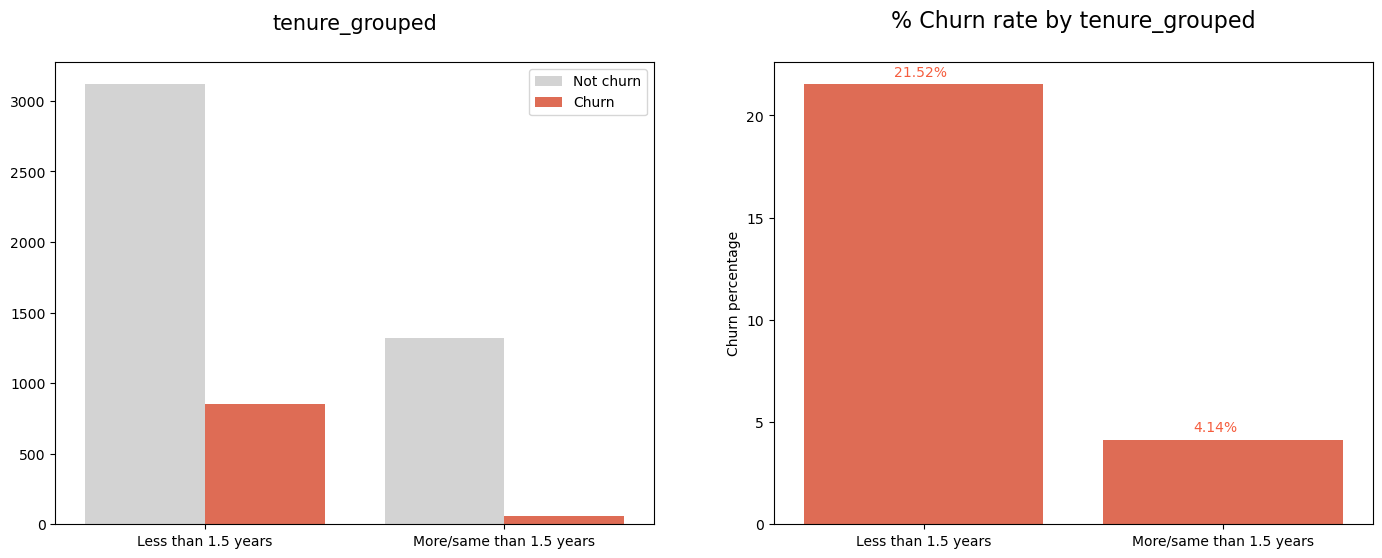

In [40]:
analysis_cat('tenure_grouped',0.1)


As two plots, we can see that churn users usuallly are new users (tenure mostly less than 1.5 years)

##### WarehouseToHome

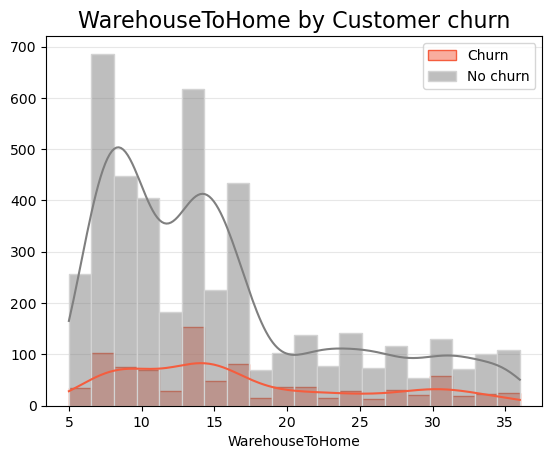

In [41]:
analysis_num('WarehouseToHome',20)


In [42]:
def distance(km):
    if km < 10:
        return 'near'
    elif km >= 10 and km <=20:
        return 'medium'
    elif km >20:
        return 'far'

,distance,Count,Percentage
medium,medium,2471,46.19
near,near,1601,29.93
far,far,1278,23.89


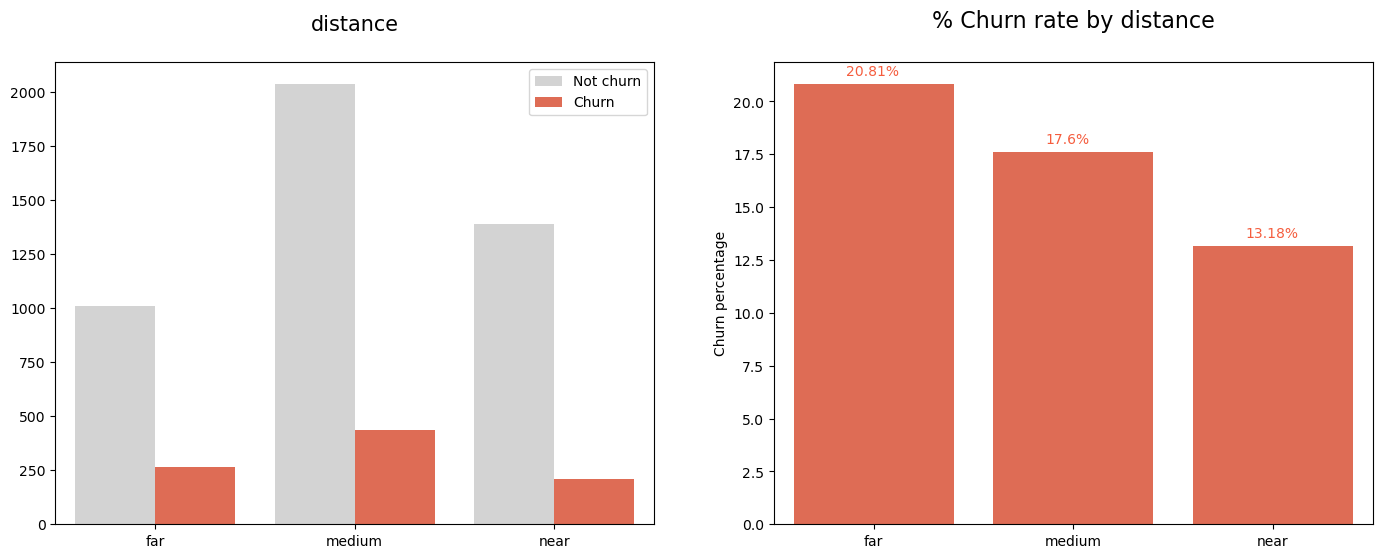

In [43]:
churn_new['distance'] = churn_new['WarehouseToHome'].apply(distance)
analysis_cat('distance', 0.14)

We see that the range is not significantly different between churn & not churn users.

##### HourSpendOnApp

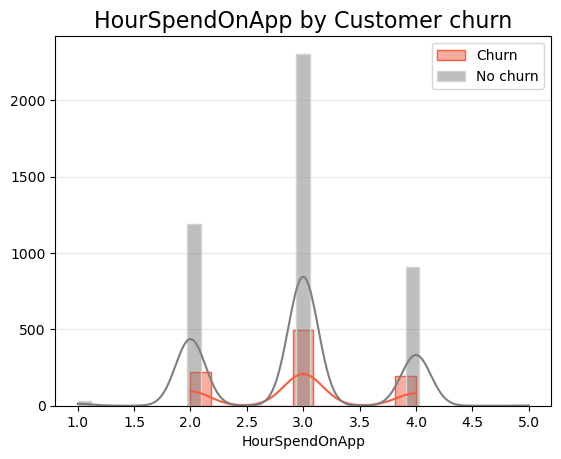

In [44]:
analysis_num('HourSpendOnApp')


,HourSpendOnApp,Count,Percentage
3.0,3.0,2799,52.32
2.0,2.0,1414,26.43
4.0,4.0,1100,20.56
1.0,1.0,34,0.64
5.0,5.0,3,0.06


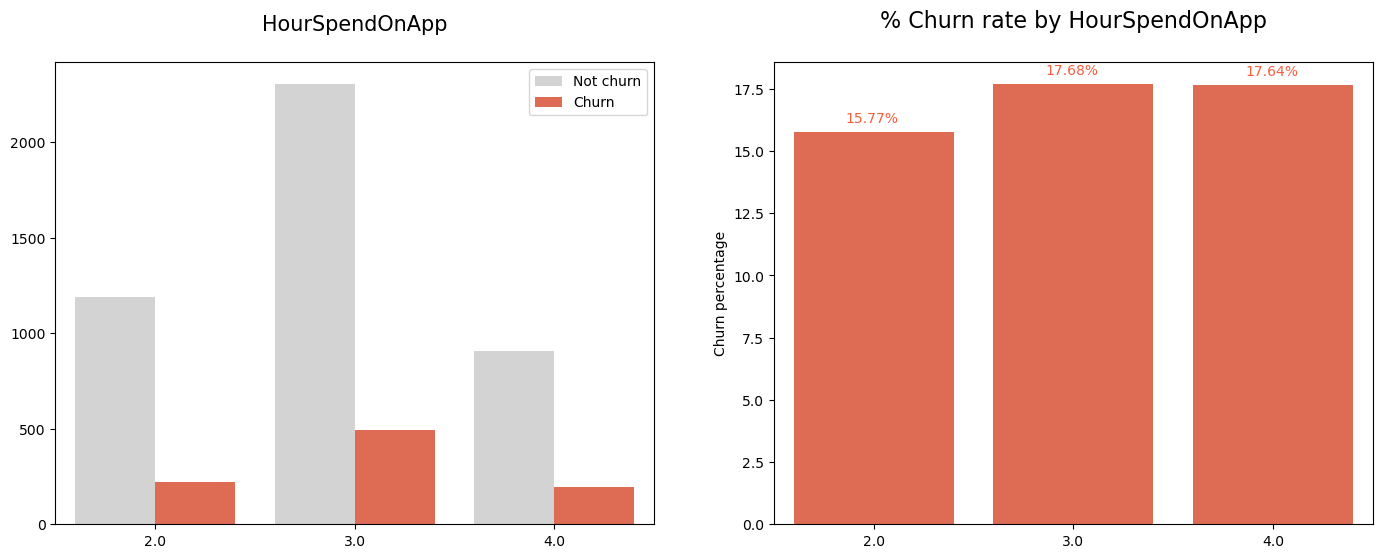

In [45]:
analysis_cat('HourSpendOnApp',0.14)


For churn & not churn users, the percentage of each hour on app is quite the same.
* 2,3, and 4 hours have the same percentage
* 1 and 5 have very small percentage.

&rarr; We can conclude there's no significantly different between churn and not churn in hours they spent on app


##### NumberOfDeviceRegistered 

,NumberOfDeviceRegistered,Count,Percentage
4,4,2245,41.96
3,3,1634,30.54
5,5,824,15.40
2,2,268,5.01
1,1,230,4.30
6,6,149,2.79


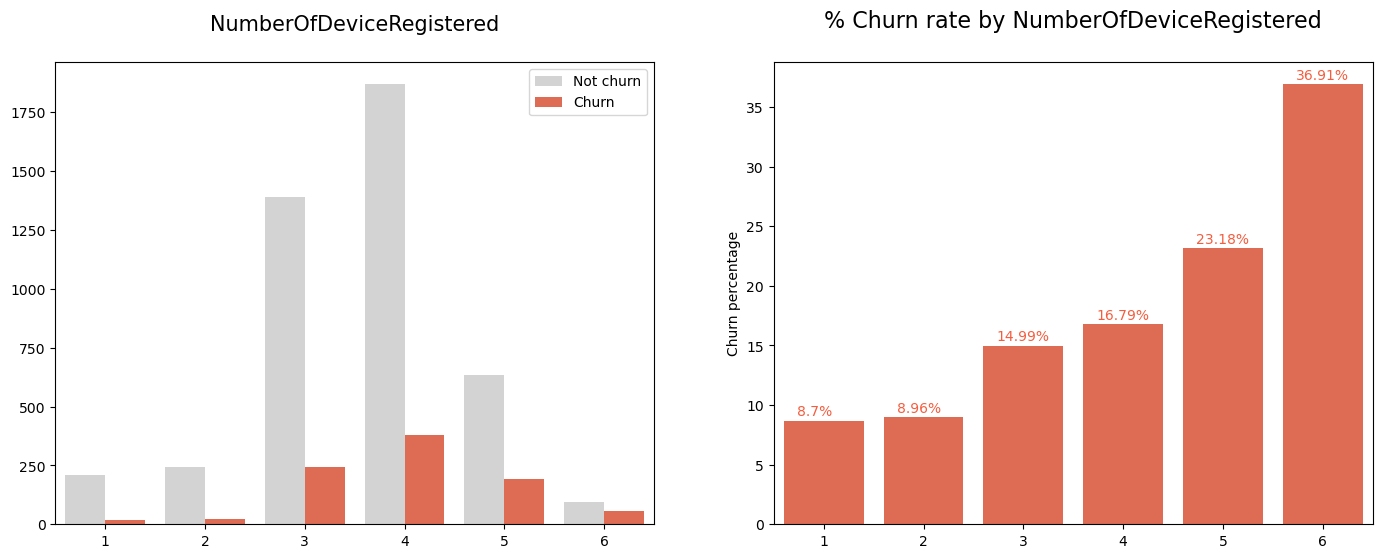

In [46]:
analysis_cat('NumberOfDeviceRegistered',0.27)


&rarr; There's no significantly different between churn and not churn users in number of device registered

##### NumberOfAddress

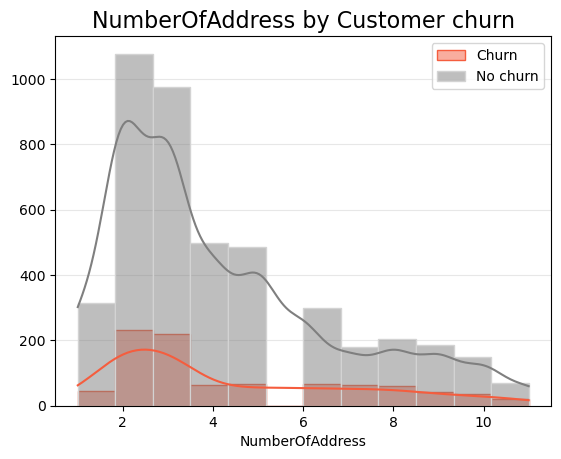

In [47]:
analysis_num('NumberOfAddress',12)


There're no significant difference between churn and not churn users in number of address

##### OrderAmountHikeFromlastYear

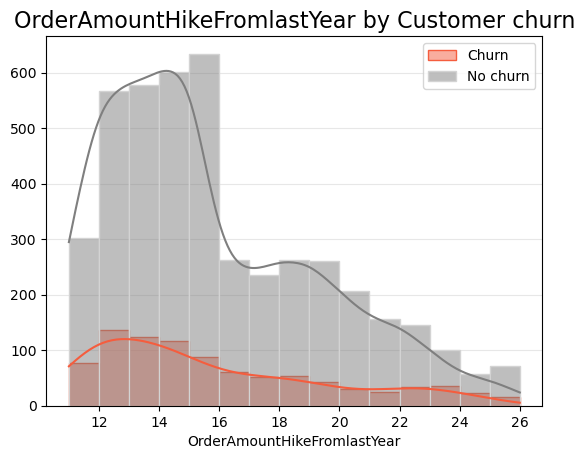

In [48]:
analysis_num('OrderAmountHikeFromlastYear',15)


There're no significant difference between churn and not churn users in order hike from last year.

##### CouponUsed

,CouponUsed,Count,Percentage
1.0,1.0,2291,42.82
2.0,2.0,1256,23.48
0.0,0.0,1023,19.12
3.0,3.0,312,5.83
4.0,4.0,182,3.40
5.0,5.0,116,2.17
6.0,6.0,93,1.74
7.0,7.0,77,1.44


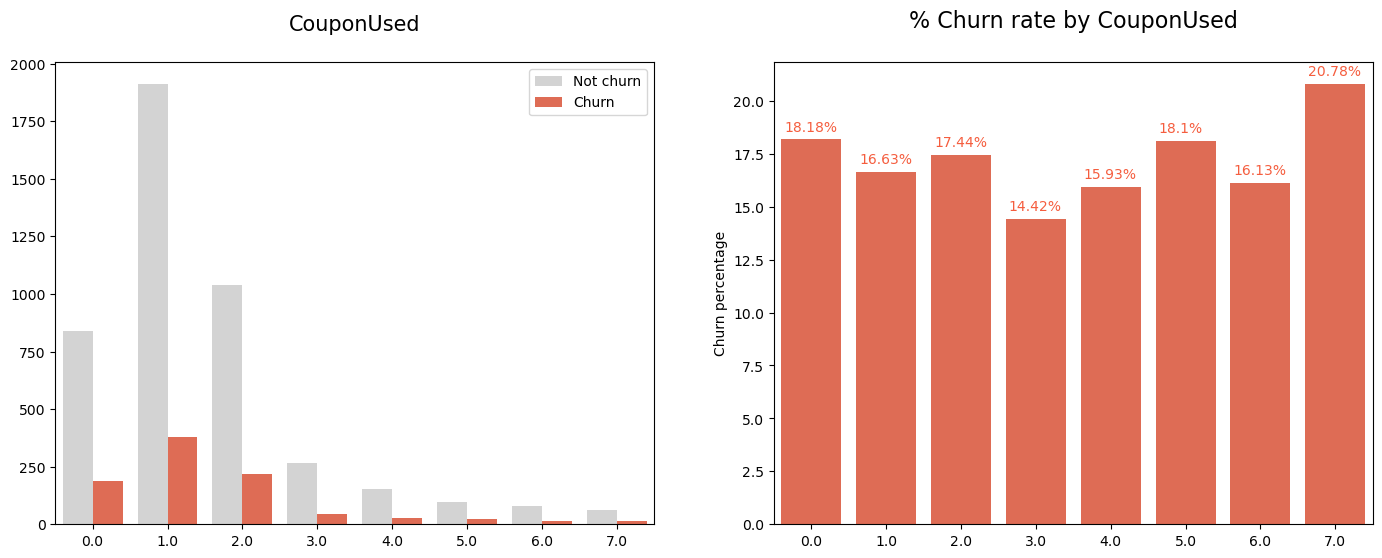

In [49]:
analysis_cat('CouponUsed',0.36)


There're no significant difference between churn and not churn users in coupon used.

##### OrderCount

,OrderCount,Count,Percentage
2.0,2.0,2254,42.13
1.0,1.0,1740,32.52
3.0,3.0,365,6.82
7.0,7.0,206,3.85
4.0,4.0,202,3.78
5.0,5.0,177,3.31
8.0,8.0,148,2.77
6.0,6.0,136,2.54
9.0,9.0,52,0.97
11.0,11.0,43,0.80


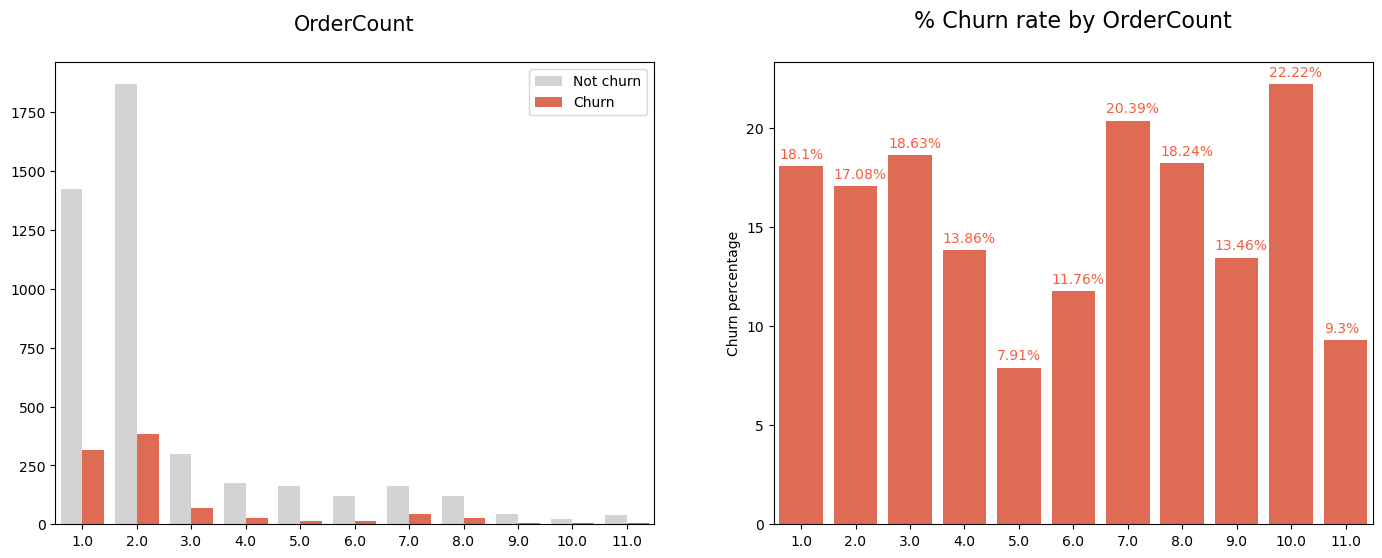

In [50]:
analysis_cat('OrderCount',.4)


There're no significant difference between churn and not churn users in order count.

##### DaySinceLastOrder

,DaySinceLastOrder,Count,Percentage
3.0,3.0,1159,21.66
2.0,2.0,786,14.69
1.0,1.0,605,11.31
8.0,8.0,507,9.48
0.0,0.0,490,9.16
7.0,7.0,427,7.98
4.0,4.0,424,7.93
9.0,9.0,261,4.88
5.0,5.0,223,4.17
10.0,10.0,137,2.56


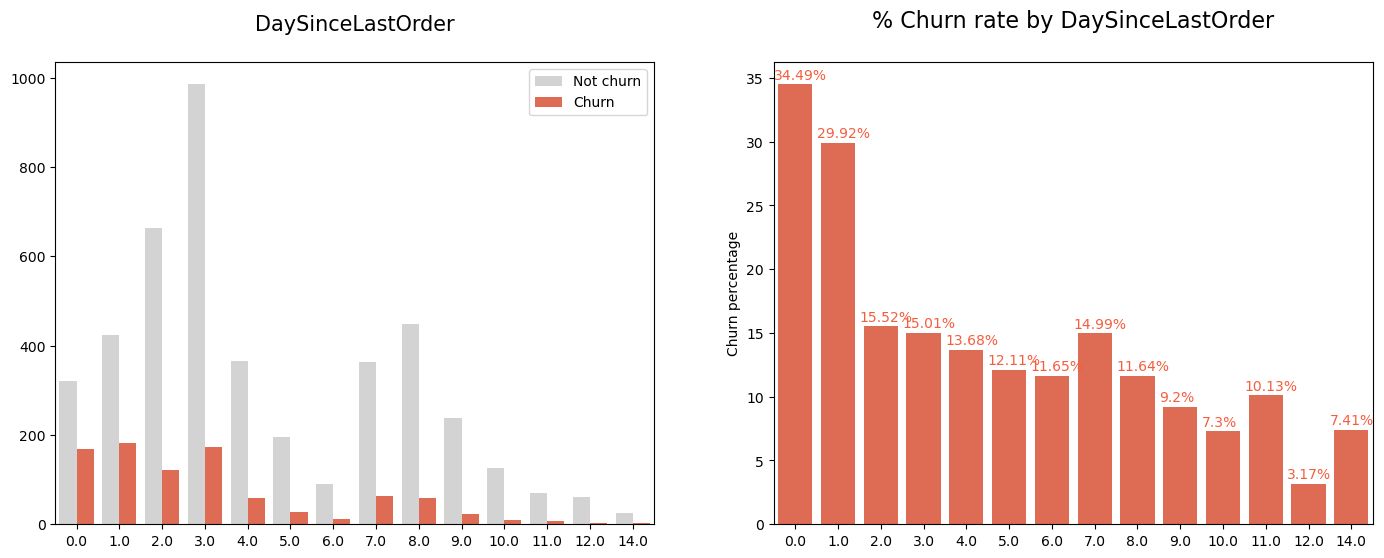

In [51]:
analysis_cat('DaySinceLastOrder',.5)


There're no significant difference between churn and not churn users in days from last orders.

##### CashbackAmount

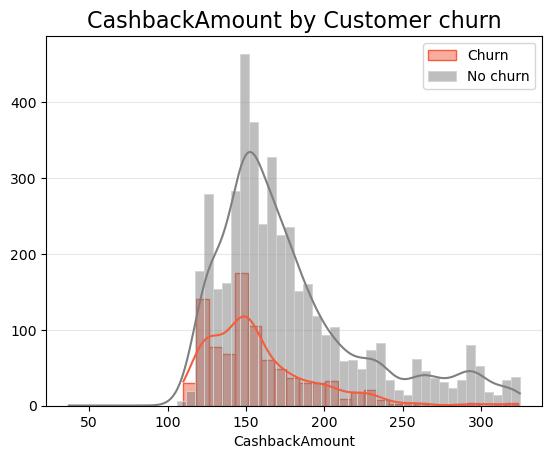

In [52]:
analysis_num('CashbackAmount')


Churn users recevied cashback amount less than not churn users.

&rarr; Use this feature for model

##### Average cashback per order

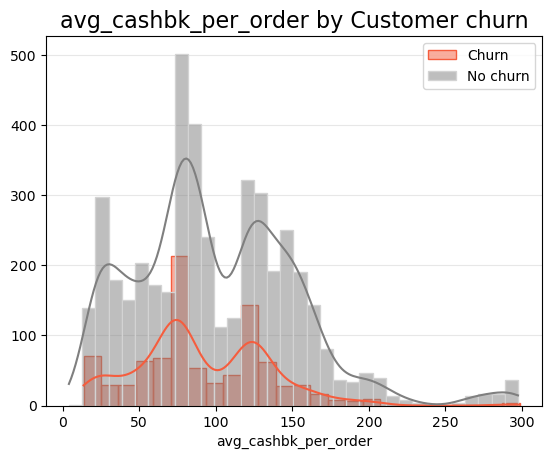

In [53]:
analysis_num('avg_cashbk_per_order')

##### Check the correlation between all numeric values

In [54]:
churn1 = churn_new.drop(['CustomerID','tenure_grouped','distance'],axis=1,errors='ignore')
churn1.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,159.93
1,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,120.90
2,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,129.60


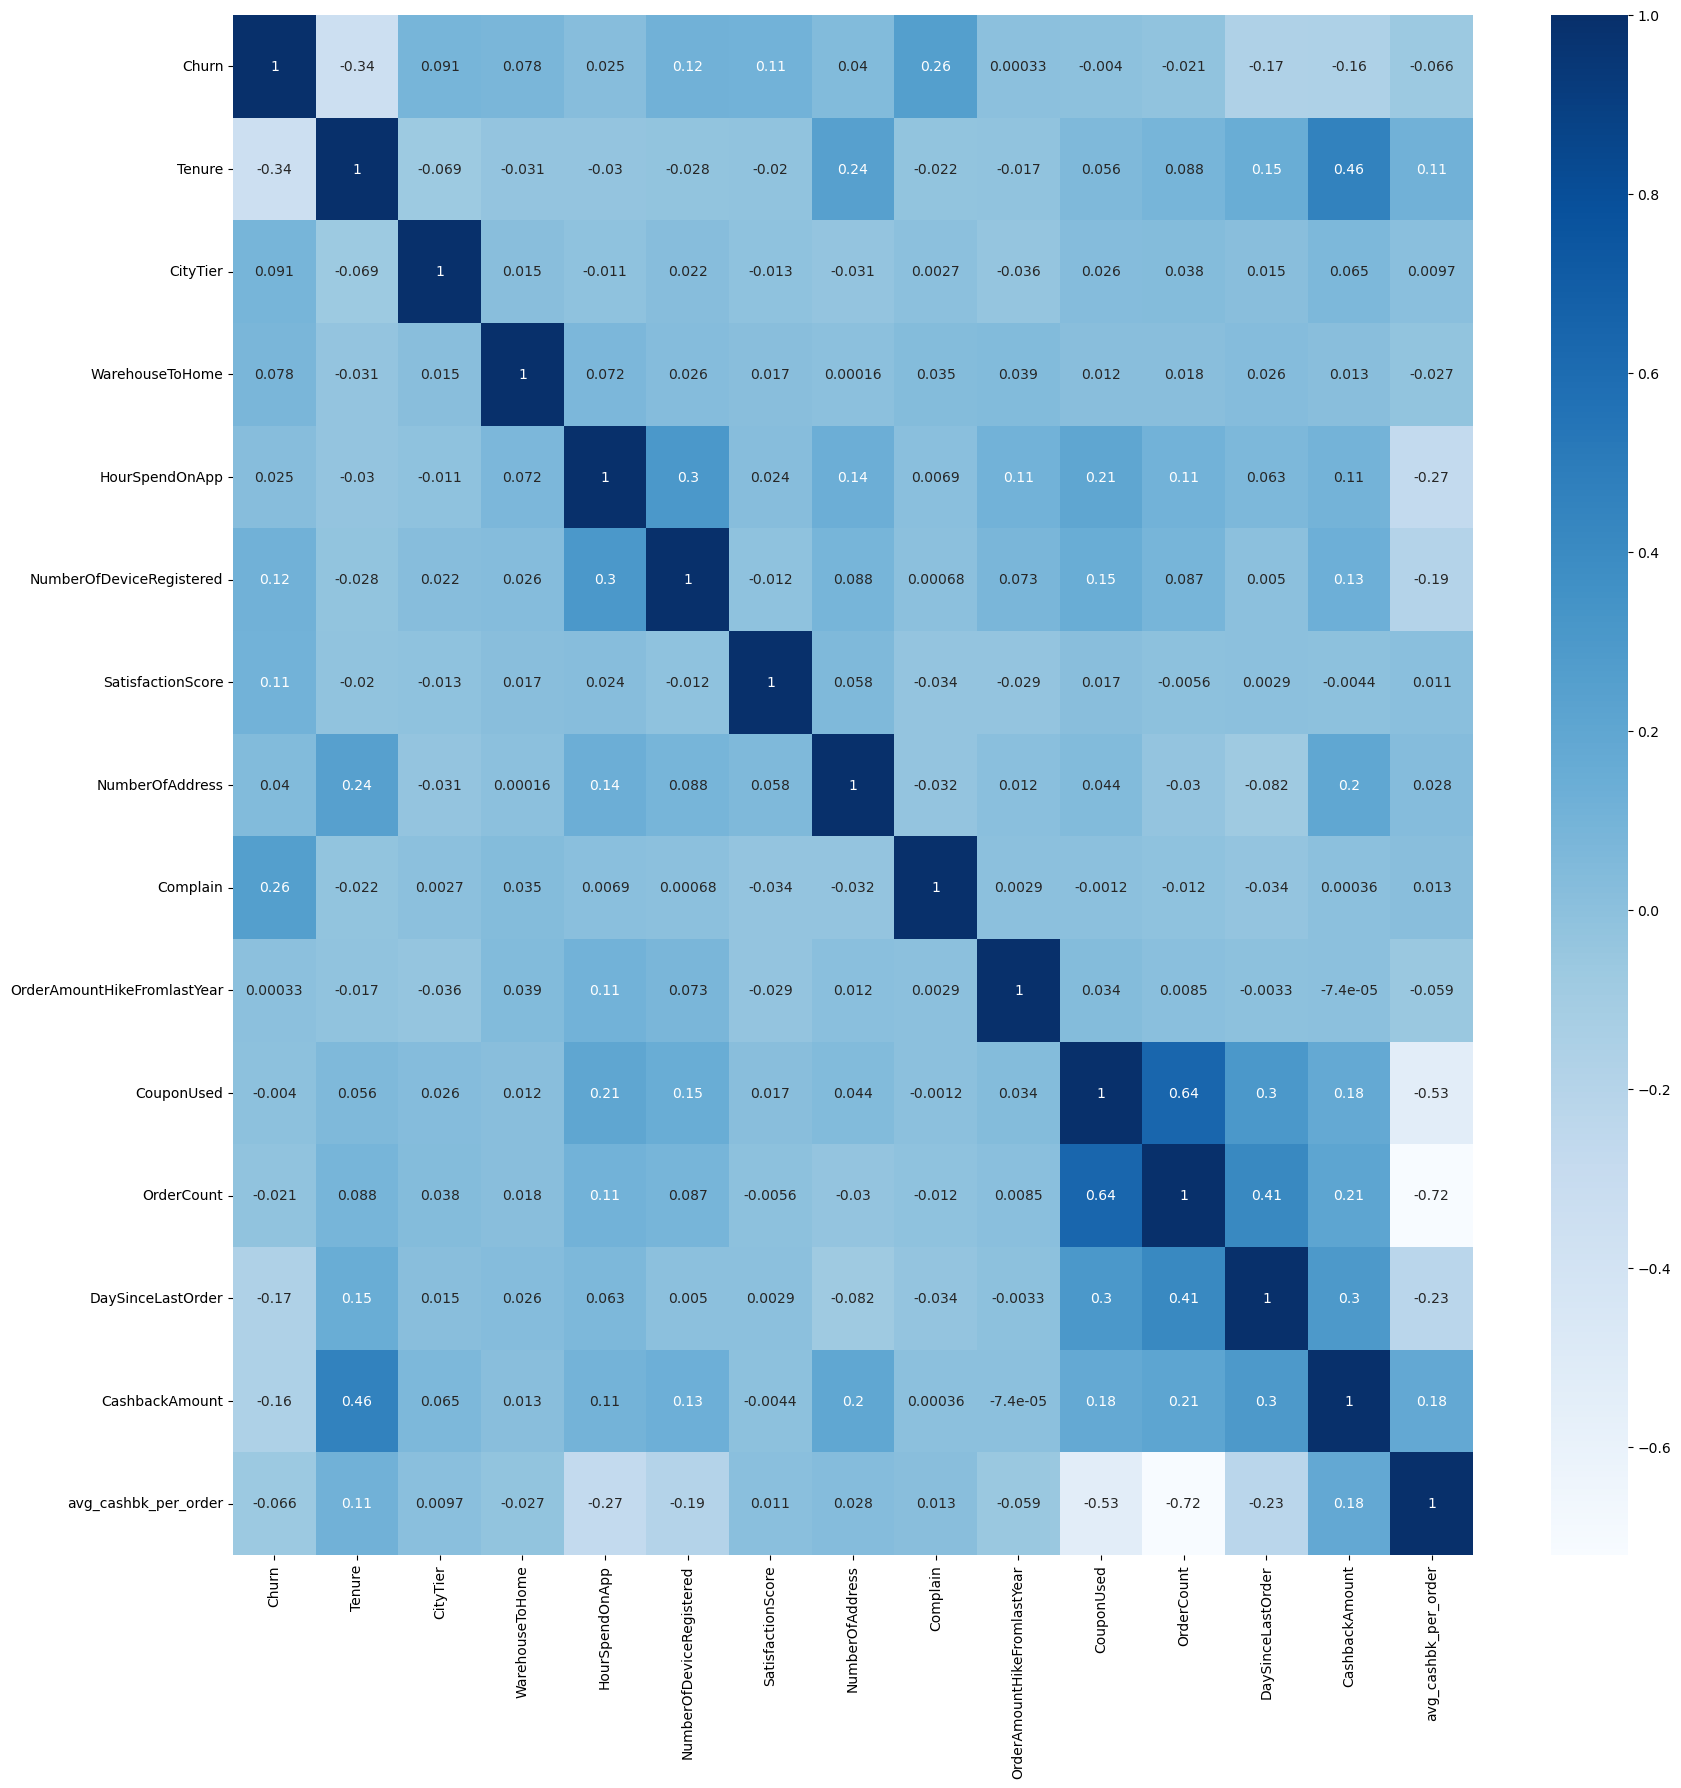

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(churn1.corr(),cmap='Blues',annot=True)
plt.show()

**After review all features, we can have the insight that:**
* Churn users usually the new users
* They refer to buy Mobile Phone
* They usually are in single status
* They have the complains
* They received less cashback amount than others

&rarr; **We can have some suggestions based on these insights:**
* We can have more promotions or special discounts for new users
* We can have more recommended products in other category when Mobile Phone order completed.
* With users that have complains for us, we can reach out to them, offer them vouchers or any special offers.

## Encoding and Normalization

# One hot encoding

In [56]:
churn_encoded = churn1.copy()
churn_encoded.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,159.93
1,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,120.90
2,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,129.60


In [57]:
churn_encoded = pd.get_dummies(churn_encoded,drop_first=True)

In [58]:
churn_encoded.head(10)

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,1,0,0,0,0,1,0,0,0,1
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,...,0,0,1,1,0,0,1,0,0,1
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,...,1,0,0,1,0,0,1,0,0,1
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,1,0,0,1,0,1,0,0,0,1
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,...,0,0,0,1,0,0,1,0,0,1
5,1,0.0,1,22.0,3.0,5,5,2,1,22.0,...,1,0,0,0,0,0,1,0,0,1
6,1,9.0,3,11.0,2.0,3,2,4,0,14.0,...,0,0,0,1,0,1,0,0,0,0
7,1,9.0,1,6.0,3.0,3,2,3,1,16.0,...,0,0,0,1,0,0,1,0,0,0
8,1,13.0,3,9.0,3.0,4,3,2,1,14.0,...,0,1,0,1,0,0,1,0,0,0
9,1,9.0,1,31.0,2.0,5,3,2,0,12.0,...,1,0,0,1,0,0,1,0,0,1


# Normalizing

In [59]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [60]:
#Scale Feature:
scaler = MinMaxScaler()
model=scaler.fit(churn_encoded)
scaled_data=model.transform(churn_encoded)
scaled_df = pd.DataFrame(scaled_data, columns = churn_encoded.columns.tolist())
scaled_df

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1.0,0.129032,1.0,0.032258,0.50,0.4,0.25,0.8,1.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.290323,0.0,0.096774,0.50,0.6,0.50,0.6,1.0,0.266667,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.290323,0.0,0.806452,0.25,0.6,0.50,0.5,1.0,0.200000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.000000,1.0,0.322581,0.25,0.6,1.00,0.7,0.0,0.800000,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,0.0,0.225806,0.50,0.4,1.00,0.2,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5345,0.0,0.322581,0.0,0.806452,0.50,0.2,0.00,0.5,0.0,0.466667,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5346,0.0,0.419355,0.0,0.258065,0.50,0.8,1.00,0.5,0.0,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5347,0.0,0.032258,0.0,0.193548,0.50,0.2,0.75,0.2,1.0,0.666667,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5348,0.0,0.741935,1.0,0.129032,0.75,0.8,0.75,0.3,0.0,0.266667,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


# Split train/test set

In [61]:
# Separate the target variable (Churn) from the features
X = churn_encoded.drop('Churn', axis=1)
y = churn_encoded['Churn']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state=42)


# Apply model: Random Forest

In [63]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

print(type(rfc))
scores = cross_val_score(rfc,X_train,y_train,cv=5, scoring='roc_auc')
print ("CV score :",scores.mean())
rfc.fit(X_train, y_train)
y_ranf_pre_train = rfc.predict(X_train)
y_ranf_pre_test = rfc.predict(X_test)
print(classification_report(y_test, y_ranf_pre_test))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score : 0.981695678729577
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       898
           1       0.99      0.85      0.92       172

    accuracy                           0.97      1070
   macro avg       0.98      0.93      0.95      1070
weighted avg       0.98      0.97      0.97      1070



In [64]:
from sklearn.metrics import balanced_accuracy_score
print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train, y_ranf_pre_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test, y_ranf_pre_test)}')

Balance accuracy of train set: 1.0
Balance accuracy of test set: 0.9262119956492464


## Show the feature important of random forest model:   

In [65]:
feats = {} # a dict to hold feature_name: feature_importance

for feature, importance in zip(X_test.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

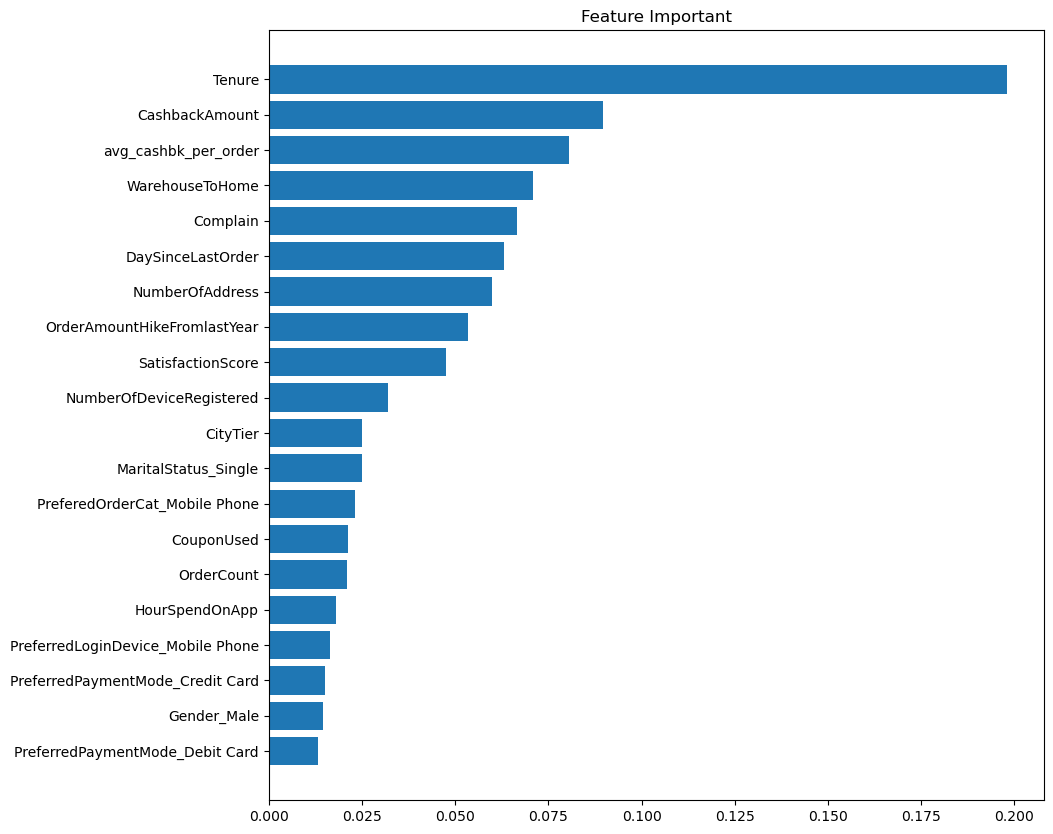

In [66]:
# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()

The model takes Tenure and Complain as the two highest important features

&rarr; Make sense with the features that we EDA in below

Average Cashback per Order in the third place of important features

&rarr; Make sense with the features that we creating in the feature engineering above

# Apply model: Logistic Regression

In [67]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

print(type(lr))
scores = cross_val_score(lr,X_train,y_train,cv=5,scoring='roc_auc')
print ("CV score :",scores.mean())
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
print(classification_report(y_test, y_pred_test))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score : 0.8825011452130097
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       898
           1       0.72      0.53      0.62       172

    accuracy                           0.89      1070
   macro avg       0.82      0.75      0.78      1070
weighted avg       0.88      0.89      0.89      1070



In [68]:
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)
print(balanced_accuracy_train,balanced_accuracy_test)

0.7311345243548634 0.7479541099083233


# Apply Model: Decision Tree

In [69]:
clf_des = tree.DecisionTreeClassifier()
clf_des.fit(X_train, y_train)

print(type(clf_des))
scores = cross_val_score(clf_des,X_train,y_train,cv=5, scoring='roc_auc')
print ("CV score :",scores.mean())
clf_des.fit(X_train, y_train)
y_tree_pre_train = clf_des.predict(X_train)
y_tree_pre_test = clf_des.predict(X_test)
print(classification_report(y_test, y_tree_pre_test))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
CV score : 0.8959383111925485
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       898
           1       0.88      0.91      0.89       172

    accuracy                           0.96      1070
   macro avg       0.93      0.94      0.94      1070
weighted avg       0.97      0.96      0.96      1070



In [70]:
print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train, y_tree_pre_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test, y_tree_pre_test)}')

Balance accuracy of train set: 1.0
Balance accuracy of test set: 0.9412389288858962


Random Forest and Decision Tree performs better than Logistic Regression

# Hyperparameter Tuning

Fine tune hyperparameters for Random Forest

In [71]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [72]:
# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='balanced_accuracy')

In [73]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='balanced_accuracy')

In [74]:
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_test, y_test)
print("Test set accuracy: ", accuracy)

Best Parameters:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test set accuracy:  0.983177570093458


In [75]:
#Apply best hyperparameter model to the data:

from sklearn import tree

clf_rand_tun = RandomForestClassifier(
    n_estimators= 100,
    max_depth = None,
    min_samples_split= 2,
    min_samples_leaf= 1,
    bootstrap= False)

clf_rand_tun.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False)

In [76]:
y_rand_tun_train = clf_rand_tun.predict(X_train)
y_rand_tun_test = clf_rand_tun.predict(X_test)

In [77]:
print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train, y_rand_tun_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test, y_rand_tun_test)}')

Balance accuracy of train set: 1.0
Balance accuracy of test set: 0.9610957165794789


In [78]:
y_rand_tun_proba = clf_rand_tun.predict_proba(X_test)[:,1]
y_rand_tun_proba

array([0.07, 0.16, 0.  , ..., 0.  , 0.  , 0.79])

**Probability Threshold selection**

As default, model will get probability threshold = 0.5 for the model. If we change the probability threshold, the accuracy of model can improve? We will use ROC curve to check which probability threshold will have highest True Positive Rate and loweest False Positive rate

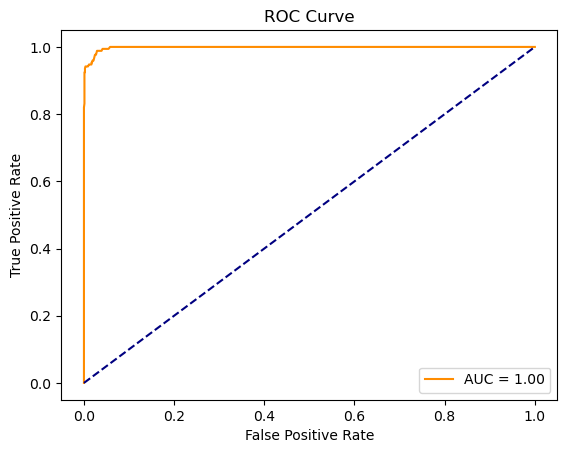

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_rand_tun_proba)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [80]:
# Calculate the distance for each threshold
distances = np.sqrt((0 - fpr)**2 + (1 - tpr)**2)
# Get the threshold for the smallest distance
best_threshold = thresholds[np.argmin(distances)]
print(f"Best threshold: {best_threshold}")

Best threshold: 0.25


In [82]:
threshold = 0.25

y_pred_prod = (y_rand_tun_proba > threshold).astype(int)

balanced_accuracy = balanced_accuracy_score(y_test, y_pred_prod)
print("Test balanced accurary :", round(balanced_accuracy,5))

Test balanced accurary : 0.97736


After hyperparameter tuning & probability threshold selecition, we will choose the model Random Forest with the hyperparameter as below and the probability = 0.25.
* n_estimators= 100,
* max_depth= None,
* min_samples_split= 2,
* min_samples_leaf= 1,
* bootstrap= False


# Conclusion

After building the 3 models, the tree classifiers performed better than the logistic regression, with random forest performing best with a test f1-score of 99%. I then tuned the hyperparameters for Random Forest which resulted is not much different.

From the models feature importance the top three features with impact on customer's churn probability are;

- The Tenure of the customer.
- Whether the customer has a complain on the service or not, as expected those with complains have higher churn rate than those without complain.
- High average cashback per order may indicate that customers who receive more cashback are less likely to churn, while low average cashback per order may suggest the opposite.

These features importances were seen in the visualizations in the EDA section and were documented as findings.